<a href="https://colab.research.google.com/github/uday-routhu/week2/blob/master/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Udayakumar Routhu

# Project 1 - Parts 1 & 2

Part 1:

This is an overview of the steps you will need to complete for part one of the project. There are more detailed instructions for each section following the overview.

1) Create a GitHub Account

2) Set up a GitHub repository that will house your first portfolio project.

3) Add Markdown cells with your name and section headers to the notebook.

4) Add the Google Colab Notebook to your GitHub repository.

5) Submit the link to your GitHub repo!

Part 2:

We will continue to work off of the GitHub repository we created last week for your first portfolio project. The goal of your portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

For Part 2, your task is to use Pandas to load in the data and start exploring and cleaning it.  As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

- Download the data using this link in the learn platform.
- Insert code below the heading "Loading Data"
  - Use Pandas to read the sales prediction data set into Google Colab.
  - Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
- Insert code below the heading "Data Cleaning"
  - Explore the data - what do you need to do to clean this data? Clean it!
  - Be sure to address each of the following tasks:

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

### Data Dictionary

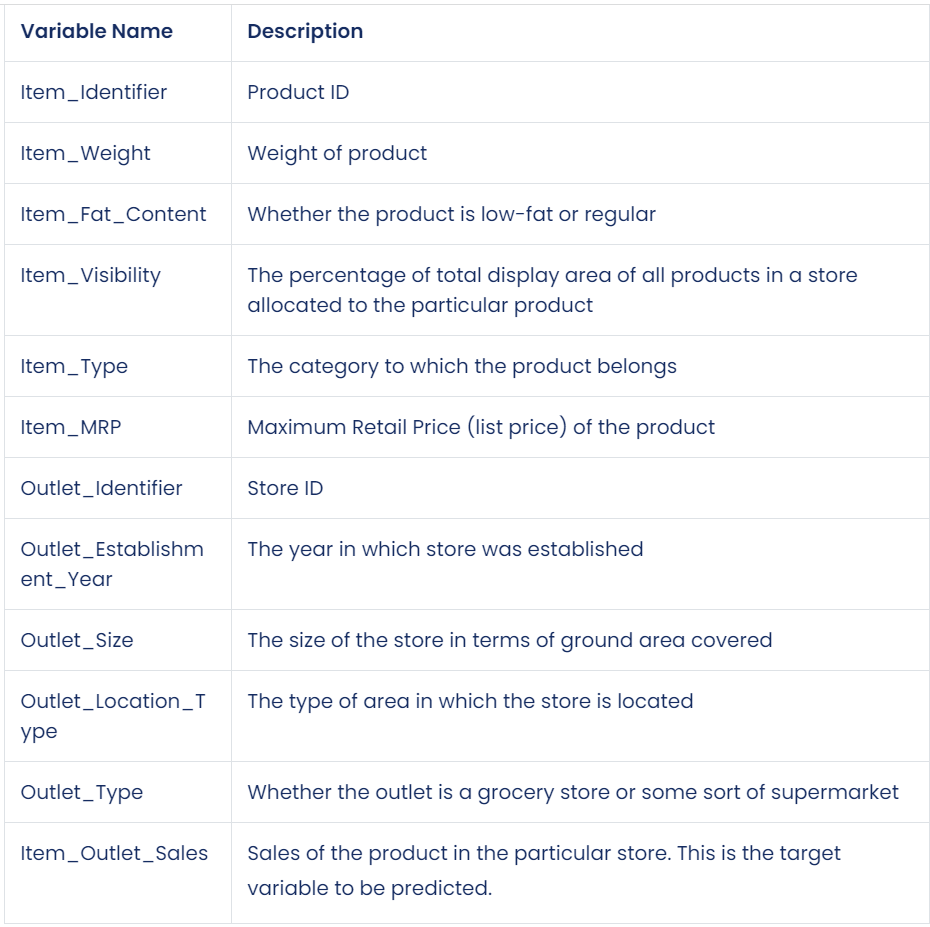

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [3]:
#Mount the drive
drive.mount('/content/data')

Mounted at /content/data


In [4]:
#create fname path
fname="/content/data/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

## Loading Data

In [5]:
df_sales_prediction = pd.read_csv(fname)


In [6]:
df_sales_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df_sales_prediction.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

How many rows/columns:

In [8]:
df_sales_prediction.shape

(8523, 12)

 - There are 8523 rows and 12 columns

Checking the data types:

In [9]:
df_sales_prediction.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


- All the data types assign as looks good

### Dropping Unnamed: 0 Column

- We will drop the `Unnamed: 0` column since this column is a repeating of the index.
- We will then check `df.info()` again to make sure that the column is dropped.

In [ ]:
df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    589 non-null    object 
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary              607 non-null    object 
 5   salary_currency     607 non-null    object 
 6   salary_in_usd       587 non-null    float64
 7   employee_residence  607 non-null    object 
 8   remote_ratio        607 non-null    int64  
 9   company_location    607 non-null    object 
 10  company_size        607 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 52.3+ KB


### Duplicated Data
Checking for duplicated data:

In [10]:
df_sales_prediction.duplicated().sum()

0

- There are 0 duplicates in the dataset which we will no drop.

In [11]:
df_sales_prediction.drop_duplicates(inplace = True)

In [12]:
df_sales_prediction.duplicated().sum()

0

- Checking to make sure duplicates were dropped.

### Missing Values
Checking for missing values:

In [13]:
df_sales_prediction.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Identifying % of missing data (optional)

In [14]:
df_sales_prediction.isna().sum() / len(df_sales_prediction) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- Missing Values:
  - There are `1463` missing values in the `Item_Weight` column. (17.16%)
  - There are `2410` missing values in the `Outlet_Size` column. (28.27%)

- In order to make informed decisions about how to handle missing data, we will do some additional EDA.

Inspecting Experience Level:

- Here we are setting the style to use for seaborn so that all the visuals have the same format.

In [ ]:
## Using three seaborn styles: dark_background, seaborn-muted and seaborn-poster.
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

In [16]:
df_sales_prediction['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

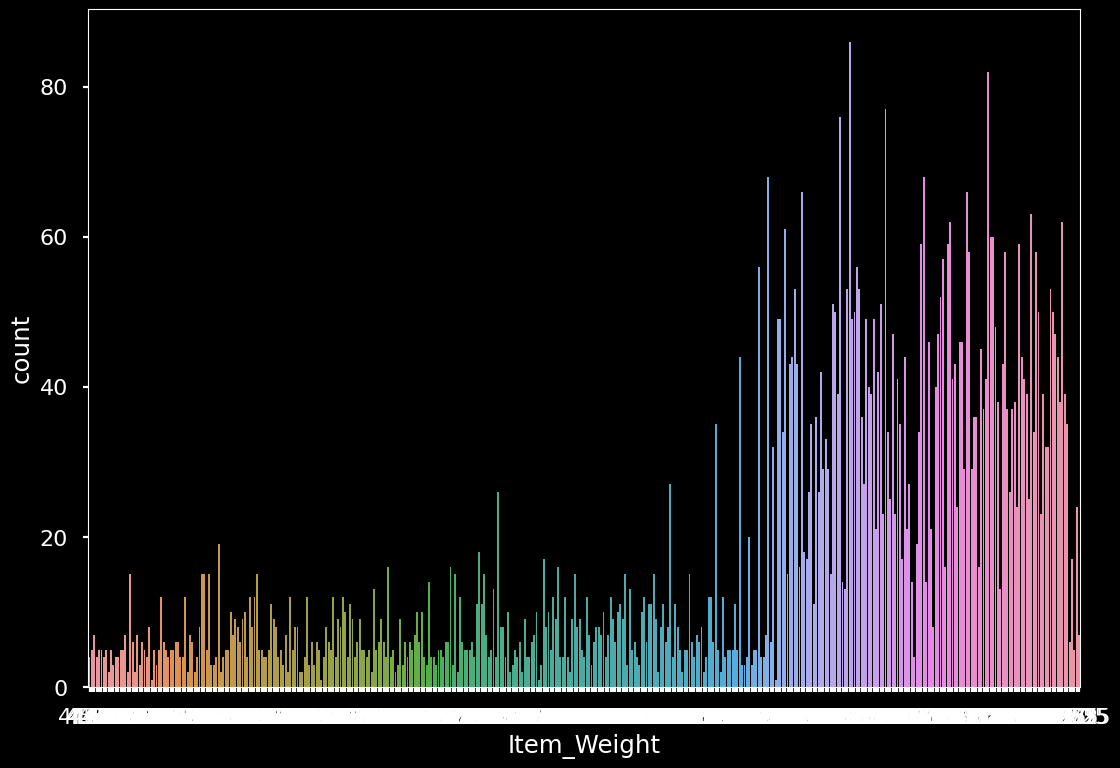

In [17]:
ax = sns.countplot(data = df_sales_prediction, x = 'Item_Weight');

 - This graph shows that there are over 1400 Item weight while there are less than 1 Item weight.
  - `Strategy #1`: To deal with the missing values, we could simply `drop` the missing values.
  - `Strategy #2`: To deal with the missing values, we could fill them in with the `most frequent` for this feature.
  - `Strategy #3`: To deal with the missing values, we could fill them in with the word `Unknown` for this feature.

- We will select `Strategy #3` to fill in the missing values with the word `Unknown` so that the values will be filled in, but we will still be aware that those values are unknown.

- Filling in the `experience_level` column with the word `Unknown`.

In [18]:
# Finding MISSING columns using isna() method
missing_columns = df_sales_prediction.columns[df_sales_prediction.isna().any()].tolist()
print(missing_columns)

['Item_Weight', 'Outlet_Size']


In [19]:
#Address the missing values by using a placeholder value.
df_sales_prediction['Item_Weight'] = df_sales_prediction['Item_Weight'].fillna('Unknown')

In [20]:
df_sales_prediction['Item_Weight'].value_counts()

Unknown    1463
12.15        86
17.6         82
13.65        77
11.8         76
           ... 
7.275         2
7.685         1
9.42          1
6.52          1
5.4           1
Name: Item_Weight, Length: 416, dtype: int64

In [21]:
#Confirm that there are no missing values after addressing them.
df_sales_prediction.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

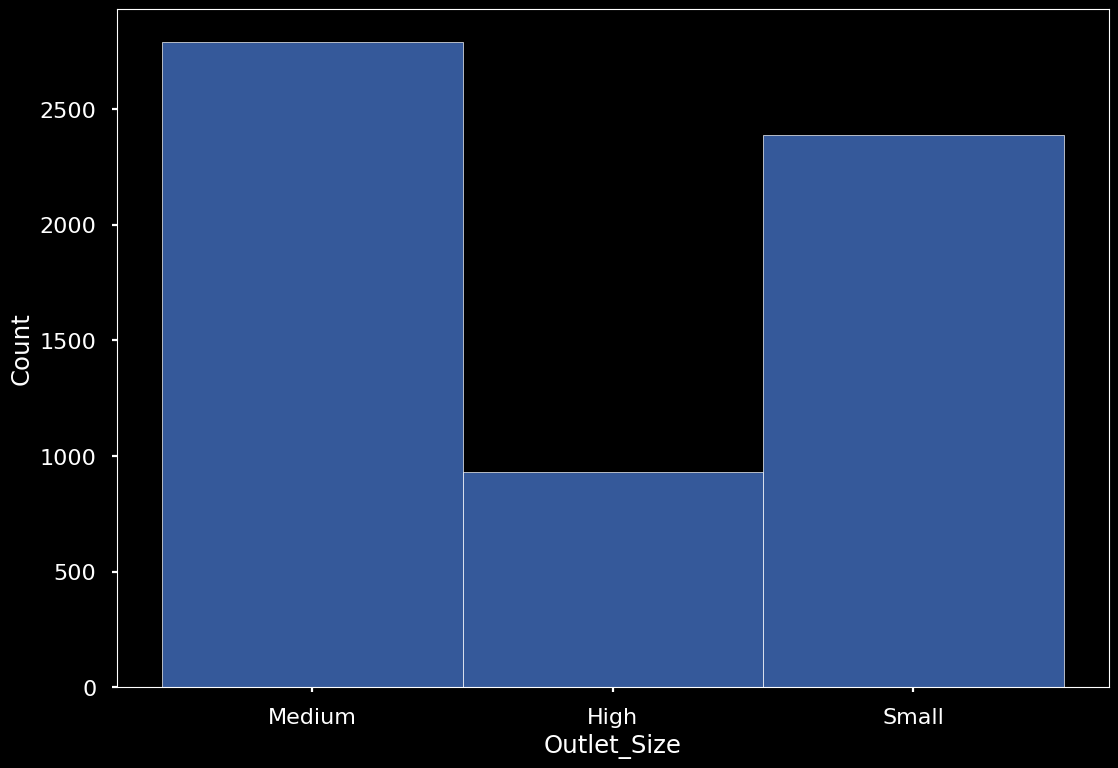

In [22]:
ax = sns.histplot(data = df_sales_prediction, x = 'Outlet_Size')

 - This graph shows that there are over 2500 Outlet_Size while there are less than 1000 Outlet_Size.
  - `Strategy #1`: To deal with the missing values, we could simply `drop` the missing values.
  - `Strategy #2`: To deal with the missing values, we could fill them in with the `most frequent` for this feature.
  - `Strategy #3`: To deal with the missing values, we could fill them in with the word `Unknown` for this feature.

- We will select `Strategy #3` to fill in the missing values with the word `Unknown` so that the values will be filled in, but we will still be aware that those values are unknown.

- Filling in the `Outlet_Size` column with the word `Unknown`.

In [23]:
df_sales_prediction['Outlet_Size'] = df_sales_prediction['Outlet_Size'].fillna(value = 'Unknown')

In [24]:
df_sales_prediction['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

- Checking to make sure the values for the `Outlet_Size` column were filled in.

In [25]:
df_sales_prediction.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Fixing Data Types

- We will now address the data types and make sure that they match the data dictionary.

In [39]:
df_sales_prediction.info()
df_sales_prediction['Item_Weight']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 865.6+ KB


0         9.3
1        5.92
2        17.5
3        19.2
4        8.93
        ...  
8518    6.865
8519     8.38
8520     10.6
8521     7.21
8522     14.8
Name: Item_Weight, Length: 8523, dtype: object

In [40]:
pd.set_option('display.max_rows', None)
df_sales_prediction['Item_Weight'].value_counts()

Unknown    1463
12.15        86
17.6         82
13.65        77
11.8         76
15.1         68
9.3          68
16.7         66
10.5         66
19.35        63
20.7         62
16.0         62
9.8          61
17.75        60
17.7         60
18.85        59
15.0         59
15.85        59
16.75        58
19.6         58
18.25        58
15.7         57
12.5         56
9.195        56
12.6         53
12.1         53
10.195       53
20.2         53
15.6         52
13.5         51
11.5         51
12.35        50
20.25        50
11.6         50
19.7         50
12.3         49
9.5          49
9.6          49
12.85        49
13.15        49
17.85        48
14.0         47
20.35        47
15.5         47
16.35        46
15.2         46
16.5         46
17.25        45
14.5         44
20.5         44
9.0          44
19.0         44
10.1         44
10.0         43
18.2         43
16.2         43
10.3         43
13.35        42
11.1         42
14.15        41
19.1         41
16.1         41
17.5    

- Upon further investigating, all of the values in the Item_Weight column are integers. Therefore, this column should be an float64 column instead of an object type column.

In [ ]:
#df_sales_prediction['Item_Weight'] = df_sales_prediction['Item_Weight'].astype('float64')

- `Aha!` There is a Unknown symbol in this column causing this column to not convert to an float64 type column. We will change the value for this entry and try again.

- We will use a filter to find the place where there is a Unknown sign symbol in the dataset. Then we will assign that cell a value of `Nan`.

In [42]:
import numpy as np
df_sales_prediction['Item_Weight'] = df_sales_prediction['Item_Weight'].replace('Unknown', np.nan)

- Now we can convert the `Item Weight` column to an `float64`.

In [43]:
df_sales_prediction['Item_Weight'] = df_sales_prediction['Item_Weight'].astype('float64')

- We will check the datatypes once more to make sure that they are as they should be.

In [44]:
df_sales_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


### Inspecting Categorical Columns & Addressing Inconsistent Values

- We will now use a filter to create a for loop that loops through all of the object type columns so that we can inspect them further.

In [27]:
data_types = df_sales_prediction.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [29]:
for col in str_cols:
    print(f'- {col}:')
    print(df_sales_prediction[col].value_counts(dropna=False))
    print("\n\n")
    print(df_sales_prediction[col])

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object
- Item_Weight:
Unknown    1463
12.15        86
17.6         82
13.65        77
11.8         76
           ... 
7.275         2
7.685         1
9.42          1
6.52          1
5.4           1
Name: Item_Weight, Length: 416, dtype: int64



0         9.3
1        5.92
2        17.5
3        19.2
4        8.93
        ...  
8518    6.865
8519     8.38
8520     10.6
8521     7.21
8522     14.8
Name: Item_Weight, Length: 8523, dtype: object
- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



0       Low

- After further investigation of the categorical columns, there are inconsistencies with spellings of the following categories in the `Item_Fat_Content` column:
  - `LF` should be `Low Fat`
  - `reg` should be `Regular`
  - `low fat` should be `Low Fat`

- We will address these inconsistencies with a data map and use a dictionary to replace the inconsistent categories.

In [30]:
job_content_map = {'LF':'Low Fat',
                   'reg':'Regular',
                   'low fat':'Low Fat'}

df_sales_prediction['Item_Fat_Content'] = df_sales_prediction['Item_Fat_Content'].replace(job_content_map)

- We will now verify that all of the inconsistent values in that column have been addressed.

In [31]:
df_sales_prediction['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Summary Statistics for Numeric Features

- We will now view use df.describe() to view the summary statistics for the numeric features.

In [32]:
df_sales_prediction.describe().round(2)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00
mean,0.07,140.99,1997.83,2181.29
std,0.05,62.28,8.37,1706.50
min,0.00,31.29,1985.00,33.29
25%,0.03,93.83,1987.00,834.25
50%,0.05,143.01,1999.00,1794.33
75%,0.09,185.64,2004.00,3101.30
max,0.33,266.89,2009.00,13086.96


- Here is another method to look at just the `mean`, `min`, and `max` for each numeric column.

In [33]:
stats =  df_sales_prediction.describe()
stats.loc[['mean','min','max']]

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,0.066132,140.992782,1997.831867,2181.288914
min,0.000000,31.290000,1985.000000,33.290000
max,0.328391,266.888400,2009.000000,13086.964800
